# Assignment 2: Linear Models and Validation Metrics
Due Date: October 10, 2023
<br>
<br>
Name: Christian Valdez

## Part 1: Classification (14.5 marks total)

### Step 0: Import Libraries

In [23]:
# common libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# for datasets
import yellowbrick
from yellowbrick.datasets import load_spam, load_concrete

# sklearn
from sklearn.model_selection import train_test_split

### Step 1: Data Input (1 mark)

The data used for this task can be downloaded using the yellowbrick library: 
https://www.scikit-yb.org/en/latest/api/datasets/spam.html

In [2]:
# import spam dataset
X, y = yellowbrick.datasets.loaders.load_spam(
    data_home=None, return_dataset=False)

In [3]:
# feature matrix
rows, cols = X.shape
data_size = X.size
print(f"There are {rows} samples and {cols} features.\nThe size of the feature matrix is {data_size}.")

There are 4600 samples and 57 features.
The size of the feature matrix is 262200.


In [4]:
# feature labels
rows, = y.shape
print(f"The feature matrix comes with the corresponding {rows} labels.\n1 indicating a not spam email (ham) and 0 for a spam email.")

The feature matrix comes with the corresponding 4600 labels.
1 indicating a not spam email (ham) and 0 for a spam email.


In [5]:
# feature data type
print("Data type for features: ", )
for feature, dtype in X.dtypes.items():
    print(f"{feature}: {dtype}")

Data type for features: 
word_freq_make: float64
word_freq_address: float64
word_freq_all: float64
word_freq_3d: float64
word_freq_our: float64
word_freq_over: float64
word_freq_remove: float64
word_freq_internet: float64
word_freq_order: float64
word_freq_mail: float64
word_freq_receive: float64
word_freq_will: float64
word_freq_people: float64
word_freq_report: float64
word_freq_addresses: float64
word_freq_free: float64
word_freq_business: float64
word_freq_email: float64
word_freq_you: float64
word_freq_credit: float64
word_freq_your: float64
word_freq_font: float64
word_freq_000: float64
word_freq_money: float64
word_freq_hp: float64
word_freq_hpl: float64
word_freq_george: float64
word_freq_650: float64
word_freq_lab: float64
word_freq_labs: float64
word_freq_telnet: float64
word_freq_857: float64
word_freq_data: float64
word_freq_415: float64
word_freq_85: float64
word_freq_technology: float64
word_freq_1999: float64
word_freq_parts: float64
word_freq_pm: float64
word_freq_direc

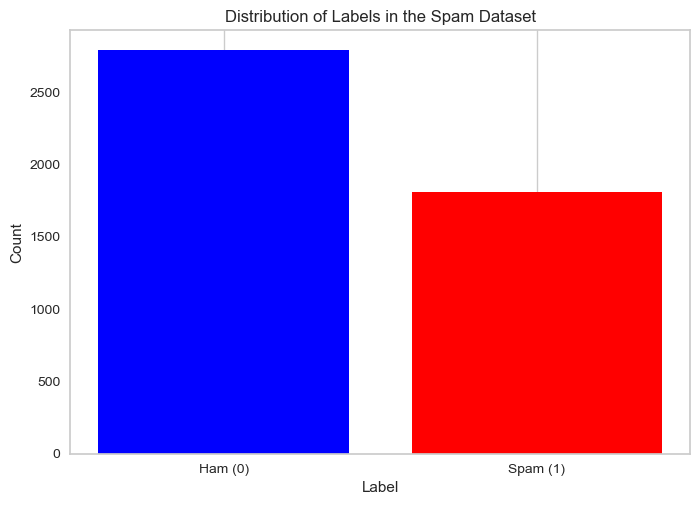

In [6]:
"""
    Checking for sample distribution.
"""

# get unique labels
unique, counts = np.unique(y, return_counts=True)

# display distribution using bar plot
plt.bar(unique, counts, color=['blue', 'red'])
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Labels in the Spam Dataset')
plt.xticks(unique, ['Ham (0)', 'Spam (1)'])
plt.grid(axis='y')

plt.show()


### Step 2: Data Processing (1.5 marks)

In [7]:
# check for missing values
missing_values_X = X.isnull().sum().sum()
missing_values_y = y.isnull().sum()

if missing_values_X != 0:
    X.fillna(0, inplace=True)
    print(f"Filled missing values in X. Total filled: {missing_values_X}")
else:
    print("There are no missing values in X.")

if missing_values_y != 0:
    y.fillna(0, inplace=True)
    print(f"Filled missing values in y. Total filled: {missing_values_y}")
else:
    print("There are no missing values in y.")

There are no missing values in X.
There are no missing values in y.


In [8]:
# split data with test size 5% of the data
X_small, X_test, y_small, y_test = train_test_split(
    X, y, test_size=0.05, random_state=42)

print(f"Training set size: {len(X_small)}")
print(f"Test set size: {len(X_test)}")

Training set size: 4370
Test set size: 230


### Step 3: Implement Machine Learning Model

1. Import `LogisticRegression` from sklearn
2. Instantiate model `LogisticRegression(max_iter=2000)`.
3. Implement the machine learning model with three different datasets: 
    - `X` and `y`
    - Only first two columns of `X` and `y`
    - `X_small` and `y_small`

In [9]:
# import
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [10]:
# get the first two columns
x_first_two_columns = X.iloc[:, :2]
x_first_two_columns.head()

,word_freq_make,word_freq_address
0,0.21,0.28
1,0.06,0.00
2,0.00,0.00
3,0.00,0.00
4,0.00,0.00


In [11]:
# using the full dataset
model = LogisticRegression(max_iter=2000)  # instantiate model
model_full = model.fit(X, y)

# dropped two columns
model = LogisticRegression(max_iter=2000)
model_first_two_columns = model.fit(x_first_two_columns, y)

# using the 95% of the dataset
model = LogisticRegression(max_iter=2000)
model_95 = model.fit(X_small, y_small)

### Step 4: Validate Model

Calculate the training and validation accuracy for the three different tests implemented in Step 3

In [12]:
training_accuracy_with_full_dataset = model_full.score(X, y)
print(f"Using the full dataset, the training accuracy = {training_accuracy_with_full_dataset}.")

Using the full dataset, the training accuracy = 0.9321739130434783.


In [13]:
training_accuracy_with_first_two_columns = model_first_two_columns.score(x_first_two_columns, y)

print(
    f"Using the first two columns, the training accuracy = {training_accuracy_with_first_two_columns}.")


Using the first two columns, the training accuracy = 0.616304347826087.


In [14]:
training_accuracy_with_partial_dataset = model_95.score(
    X_small, y_small)
validation_accuracy_with_partial_dataset = model_95.score(
    X_test, y_test)

print(
    f"Using the first two columns, the training accuracy = {training_accuracy_with_partial_dataset}.\nThe validation accuracy = {validation_accuracy_with_partial_dataset}.")


Using the first two columns, the training accuracy = 0.9327231121281464.
The validation accuracy = 0.9260869565217391.


### Step 5: Visualize Results (4 marks)

1. Create a pandas DataFrame `results` with columns: Data size, training accuracy, validation accuracy
2. Add the data size, training and validation accuracy for each dataset to the `results` DataFrame
3. Print `results`

In [15]:
# TO DO: ADD YOUR CODE HERE FOR STEPS 3-5
# Note: for any random state parameters, you can use random_state = 0
# HINT: USING A LOOP TO STORE THE DATA IN YOUR RESULTS DATAFRAME WILL BE MORE EFFICIENT

Questions to ask:
1. For the full dataset and first two columns, what are we testing them with?
2. Is the validation accuracy the same as the test accuracy?
3. I don't really understand how a loop would work to iterate through the 3 different validation because there is no pattern between them.

### Questions (4 marks)
1. How do the training and validation accuracy change depending on the amount of data used? Explain with values.
2. In this case, what do a false positive and a false negative represent? Which one is worse?

*YOUR ANSWERS HERE*

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

*DESCRIBE YOUR PROCESS HERE*

## Part 2: Regression (10.5 marks total)

For this section, we will be evaluating concrete compressive strength of different concrete samples, based on age and ingredients. You will need to repeat the steps 1-4 from Part 1 for this analysis.

### Step 1: Data Input (1 mark)

The data used for this task can be downloaded using the yellowbrick library: 
https://www.scikit-yb.org/en/latest/api/datasets/concrete.html

In [24]:
# import  dataset
X, y = yellowbrick.datasets.loaders.load_concrete(
    data_home=None, return_dataset=False)


In [25]:
# feature matrix
rows, cols = X.shape
data_size = X.size
print(
    f"There are {rows} samples and {cols} features.\nThe size of the feature matrix is {data_size}.")


There are 1030 samples and 8 features.
The size of the feature matrix is 8240.


### Step 2: Data Processing (0.5 marks)

In [27]:
# check for missing values
missing_values_X = X.isnull().sum().sum()
missing_values_y = y.isnull().sum()

if missing_values_X != 0:
    X.fillna(0, inplace=True)
    print(f"Filled missing values in X. Total filled: {missing_values_X}")
else:
    print("There are no missing values in X.")

if missing_values_y != 0:
    y.fillna(0, inplace=True)
    print(f"Filled missing values in y. Total filled: {missing_values_y}")
else:
    print("There are no missing values in y.")


There are no missing values in X.
There are no missing values in y.


### Step 3: Implement Machine Learning Model (1 mark)

In [32]:
#import Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

Questions:
1. Do we need to split the data?

In [31]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [33]:
# Initialize and train a linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions
linear_predictions = linear_model.predict(X_test)

# Evaluate the model
linear_mae = mean_absolute_error(y_test, linear_predictions)
linear_rmse = np.sqrt(mean_squared_error(y_test, linear_predictions))

print("Linear Regression:")
print(f"Mean Absolute Error: {linear_mae}")
print(f"Root Mean Squared Error: {linear_rmse}")

Linear Regression:
Mean Absolute Error: 7.9873812061653116
Root Mean Squared Error: 10.079529233496451


### Step 4: Validate Model (1 mark)

Calculate the training and validation accuracy using mean squared error and R2 score.

In [19]:
# TO DO: ADD YOUR CODE HERE

### Step 5: Visualize Results (1 mark)
1. Create a pandas DataFrame `results` with columns: Training accuracy and Validation accuracy, and index: MSE and R2 score
2. Add the accuracy results to the `results` DataFrame
3. Print `results`

In [20]:
# TO DO: ADD YOUR CODE HERE

### Questions (2 marks)
1. Did using a linear model produce good results for this dataset? Why or why not?

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

*DESCRIBE YOUR PROCESS HERE*

## Part 3: Observations/Interpretation (3 marks)

Describe any pattern you see in the results. Relate your findings to what we discussed during lectures. Include data to justify your findings.


*ADD YOUR FINDINGS HERE*

## Part 4: Reflection (2 marks)
Include a sentence or two about:
- what you liked or disliked,
- found interesting, confusing, challangeing, motivating
while working on this assignment.


*ADD YOUR THOUGHTS HERE*

## Part 5: Bonus Question (4 marks)

Repeat Part 2 with Ridge and Lasso regression to see if you can improve the accuracy results. Which method and what value of alpha gave you the best R^2 score? Is this score "good enough"? Explain why or why not.

**Remember**: Only test values of alpha from 0.001 to 100 along the logorithmic scale.

In [21]:
# TO DO: ADD YOUR CODE HERE

*ANSWER HERE*